In [1]:
# Importing the libraries and dataset
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn 
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Reading in the csv file
df = pd.read_csv('../input/retail-sales-dataset/retail_sales_dataset.csv')


In [2]:
# Cleaning the data 

# Replacing column name spaces with underscores
df.columns = df.columns.str.replace(' ', '_')

# Convert the date column into a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day, month, and year components
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
# Converts numbered months to string for plotting
df['Month'] = df['Date'].dt.month_name().str[:3]

# Create a new column to categorize age groups
df.loc[df['Age']<25, 'Age_Group'] = 'Youths (<25)'
df.loc[df['Age'].between(25,34), 'Age_Group'] = 'Young Adults (25-34)'
df.loc[df['Age'].between(35,64), 'Age_Group'] = 'Adults (35-64)'
df.loc[df['Age']>64, 'Age_Group'] = 'Seniors (65+)'

print(df)

     Transaction_ID       Date Customer_ID  Gender  Age Product_Category  \
0                 1 2023-11-24     CUST001    Male   34           Beauty   
1                 2 2023-02-27     CUST002  Female   26         Clothing   
2                 3 2023-01-13     CUST003    Male   50      Electronics   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
4                 5 2023-05-06     CUST005    Male   30           Beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    Male   62         Clothing   
996             997 2023-11-17     CUST997    Male   52           Beauty   
997             998 2023-10-29     CUST998  Female   23           Beauty   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price_per_Unit  Total_Amount  Day Month  Year  \
0           3          

In [3]:
df['Customer_ID'].nunique()

1000

In [4]:
df['Month'].value_counts()

Month
May    105
Oct     96
Aug     94
Dec     91
Apr     86
Feb     85
Nov     78
Jan     78
Jun     77
Mar     73
Jul     72
Sep     65
Name: count, dtype: int64

In [5]:
df.describe()

,Transaction_ID,Date,Age,Quantity,Price_per_Unit,Total_Amount,Day,Year
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000,15.310000,2023.002000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000,1.000000,2023.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000,7.000000,2023.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000,15.000000,2023.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000,23.000000,2023.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,31.000000,2024.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632,8.871674,0.044699


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer_ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product_Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price_per_Unit    1000 non-null   int64         
 8   Total_Amount      1000 non-null   int64         
 9   Day               1000 non-null   int32         
 10  Month             1000 non-null   object        
 11  Year              1000 non-null   int32         
 12  Age_Group         1000 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(5), object(5)
memory usage: 93.9+ KB


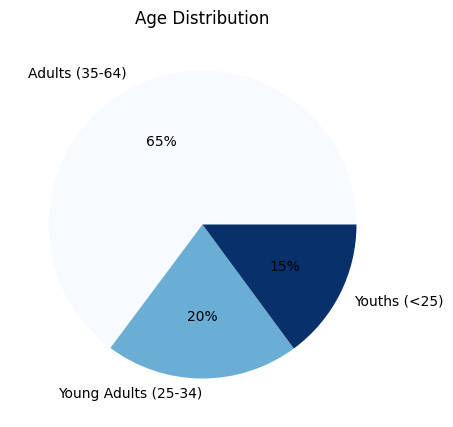

In [7]:
# Plot the Age Distribution into a pie chart
df['Age_Group'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', shadow = False, cmap = 'Blues', figsize = (10,5), title = 'Age Distribution', ylabel = '')
plt.savefig('Age Distribution.jpg', dpi = 200, transparent = False, bbox_inches = 'tight')


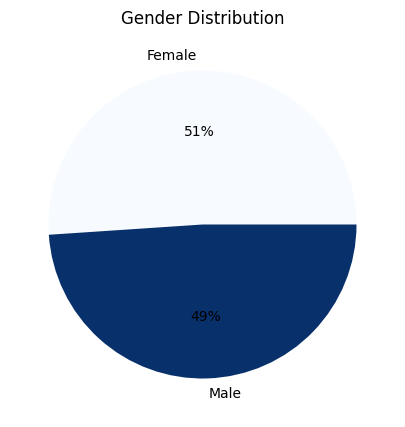

In [8]:
# Plot the Gender Distribution into a pie chart
df.groupby('Gender').sum(numeric_only = True)['Total_Amount'].sort_values(ascending = False).plot(kind = 'pie', autopct = '%.0f%%', shadow = False, cmap = 'Blues', figsize = (10,5), title = 'Gender Distribution', ylabel ='')
plt.savefig('Gender Distribution.jpg', dpi = 200, transparent = False, bbox_inches = 'tight')


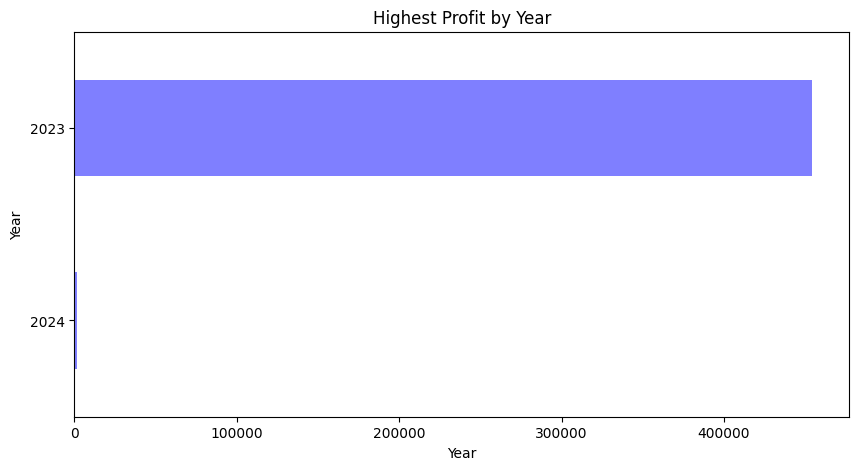

In [9]:
# Plot the Highest Profit by Year into a horizontal bar chart
df.groupby('Year').sum(numeric_only = True)['Total_Amount'].sort_values(ascending = True).plot(kind = 'barh', color = 'Blue', alpha = 0.5, figsize = (10,5), title = 'Highest Profit by Year', xlabel = 'Year')
plt.savefig('Highest Profit by Year.jpg', dpi = 200, transparent = False, bbox_inches = 'tight' )

/tmp/ipykernel_18/691351665.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, plt3[i], plt3[i], ha = 'center', va = 'bottom')


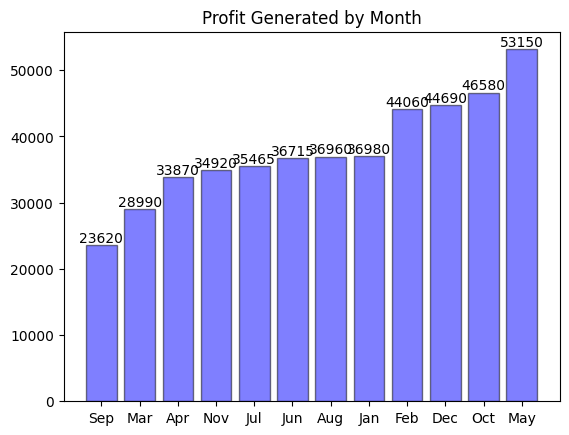

In [10]:
# Plot the Profits by Month into a bar chart
plt3 = df.groupby('Month').sum(numeric_only = True)['Total_Amount'].sort_values(ascending = True)
plt.bar(plt3.index, plt3, fc = 'Blue', ec = 'Black', alpha = 0.5)
plt.title('Profit Generated by Month')

for i in range(len(plt3)):
    plt.text(i, plt3[i], plt3[i], ha = 'center', va = 'bottom')
    
plt.savefig('Profit Generated by Month.jpg', dpi = 200, transparent = False, bbox_inches = 'tight')


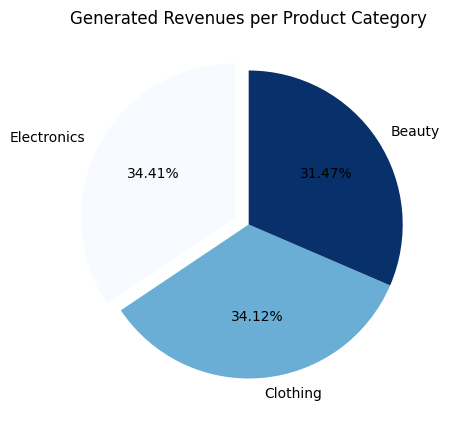

In [11]:
# Plot by Product Category that generates the highest revenue
explode = [0.1, 0, 0]
df.groupby('Product_Category').sum(numeric_only = True)['Total_Amount'].sort_values(ascending = False).plot(kind = 'pie', autopct = '%.2f%%', shadow = False, cmap = 'Blues', figsize = (10,5), title = 'Generated Revenues per Product Category', ylabel ='', startangle= 90, explode = explode)
plt.savefig('Generated Revenue by Product Category.jpg', dpi = 200, transparent = False, bbox_inches = 'tight')

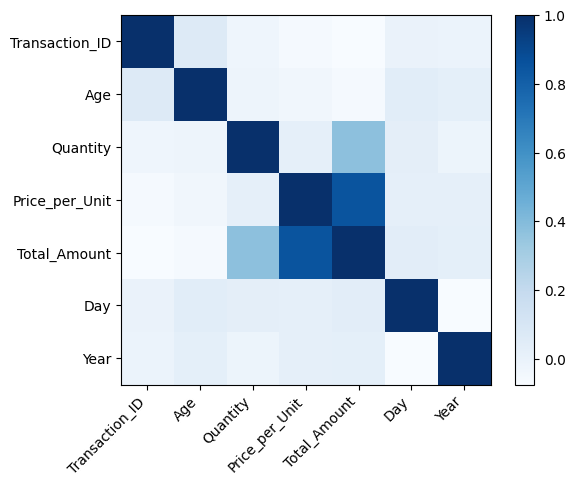

In [12]:
matrix = df.corr(numeric_only = True)
plt.imshow(matrix, cmap = 'Blues')

#plotting correlation matrix 
plt.imshow(matrix, cmap='Blues')

#adding colorbar 
plt.colorbar()

#extracting variable names 
variables = []
for i in matrix.columns:
  variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)

# Display the plot
plt.show()